In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('GME', data_source = 'yahoo', start = '2010-01-01', end = '2021-01-29')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,22.180000,21.940001,22.080000,21.940001,2141800.0,14.772204
2010-01-04,22.950001,22.000000,22.070000,22.900000,6675700.0,15.418571
2010-01-05,23.740000,22.900000,22.910000,23.520000,5317400.0,15.836020
2010-01-06,24.100000,23.219999,23.459999,24.030001,5367800.0,16.179401
2010-01-07,21.170000,19.420000,20.010000,20.459999,41190300.0,13.775718
...,...,...,...,...,...,...
2021-01-25,159.179993,61.130001,96.730003,76.790001,177874000.0,76.790001
2021-01-26,150.000000,80.199997,88.559998,147.979996,178588000.0,147.979996
2021-01-27,380.000000,249.000000,354.829987,347.510010,93396700.0,347.510010


In [3]:
print(df.shape)

(2789, 6)


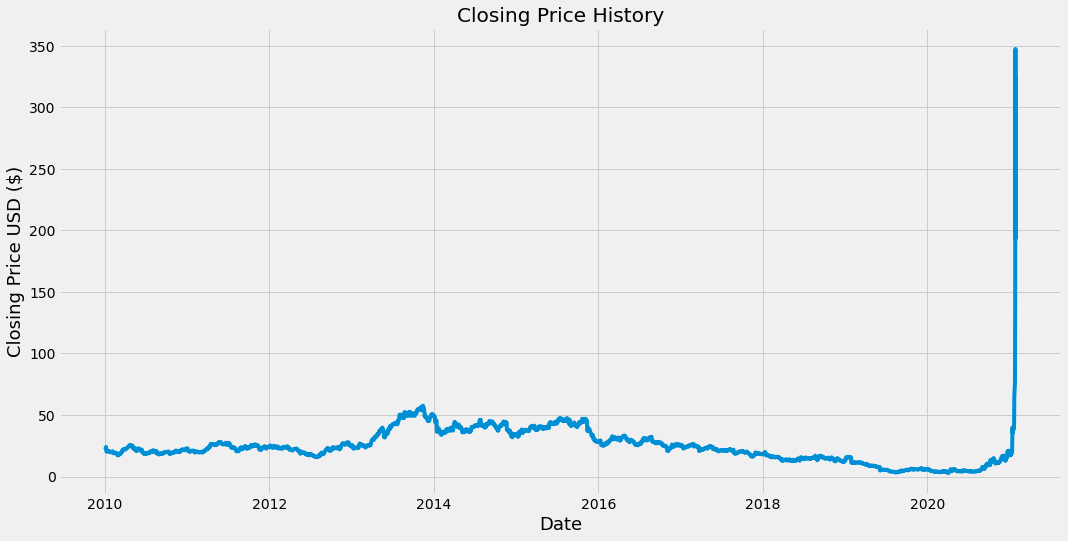

In [4]:
# Visualize the price
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Close column data
data = df.filter(['Close'])
dataset = data.values
trian_data_len = math.ceil(len(dataset) * .8)
print(trian_data_len)

2232


In [6]:
# Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.05552493]
 [0.05830988]
 [0.0601085 ]
 ...
 [1.        ]
 [0.55350875]
 [0.93469871]]


In [7]:
# Creating the training data
train_data = scaled_data[0:trian_data_len, :]
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])
    if i<=50:
        print(x_train)
        print(y_train)
        print()

[array([0.05552493, 0.05830988, 0.0601085 , 0.061588  , 0.05123147,
       0.0507383 , 0.05082533, 0.05213078, 0.0521888 , 0.05134751,
       0.05134751, 0.05224681, 0.05137652, 0.05111543, 0.04998405,
       0.04969395, 0.04885266, 0.04972296, 0.04949088, 0.04922979,
       0.04969395, 0.05056424, 0.05137652, 0.05018711, 0.05033216,
       0.04899771, 0.04647385, 0.04748919, 0.04804038, 0.04748919,
       0.04696701, 0.0478083 , 0.04821444, 0.04789533, 0.0472281 ,
       0.0466189 , 0.04658989, 0.04267355, 0.04177425, 0.04261553,
       0.04261553, 0.04365989, 0.04348583, 0.04432711, 0.0454585 ,
       0.04426909, 0.04490731, 0.04801137, 0.04760523, 0.04815642])]
[0.048185429555966844]



In [8]:
# converting training data into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# reshaping the training data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2182, 50, 1)

In [9]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
# Compliling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2182/2182 [==============================] - 33s 15ms/step - loss: 8.4574e-05


In [11]:
# Creating the testing data
test_data = scaled_data[trian_data_len - 50: , :]

x_test = []
y_test = dataset[trian_data_len:, :]

for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [12]:
# Converting the test data in numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
# model predicted value
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [14]:
# Getting the RMSE
rmse = np.sqrt(np.mean(pred - y_test)**2)
print(rmse)

1.4133668318257084


1. rmse =np.sqrt(np.mean(((pred- y_test)**2)))
2. rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)),2)))
3. rmse = np.sqrt(((pred - y_test) ** 2).mean())

<ipython-input-15-ae1b175a47d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


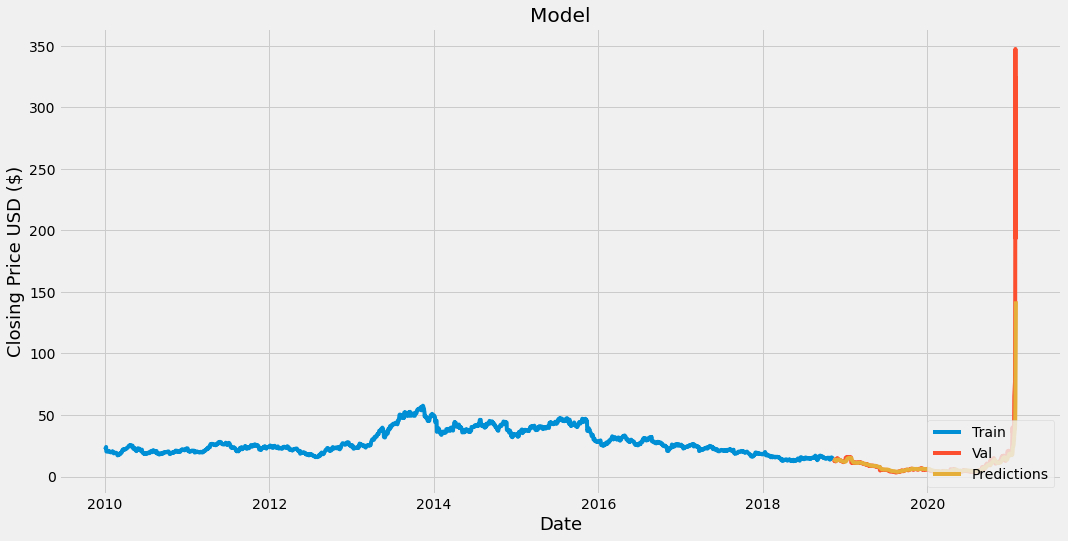

In [15]:
# Plotting the Data
train = data[:trian_data_len]
valid = data[trian_data_len:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [16]:
# Checking the valid and predicted price
valid

,Close,Predictions
Date,,
2018-11-12,13.880000,14.448466
2018-11-13,13.880000,14.292950
2018-11-14,12.960000,14.107563
2018-11-15,13.130000,13.817545
2018-11-16,12.790000,13.538317
...,...,...
2021-01-25,76.790001,38.827488
2021-01-26,147.979996,45.819908
2021-01-27,347.510010,62.433834


In [17]:
# Creating the Final Model to predict the price
apple = web.DataReader('GME', data_source = 'yahoo', start = '2010-01-01', end = '2021-01-29')

df_1 = apple.filter(['Close'])

last_50_days = df_1[-50:].values

last_50_days_scaled = scaler.transform(last_50_days)

X_test = []

X_test.append(last_50_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_1 = model.predict(X_test)

pred_1 = scaler.inverse_transform(pred_1)
print(pred_1)

[[183.64021]]


In [18]:
# Actually Checking the price
GameStop_1 = web.DataReader('GME', data_source = 'yahoo', start = '2021-01-29', end = '2021-01-29')
print(GameStop_1['Close'])

Date
2021-01-28    193.600006
2021-01-29    325.000000
Name: Close, dtype: float64
